# N-gram
<img src="https://cdn.botpenguin.com/assets/website/N_Gram_feb7947286.png">

- 토큰들을 하나의 단어 모음 벡터로 표현하면 단어들의 순서에 담긴 정보가 사라짐
- 하지만 인접 단어들을 묶으면 단어의 `문맥(Context)`이 어느 정도 형성
- 하지만 n-gram은 문서에서 전반적으로 희소하게 나타나며 자주 발견되는 n-gram들은 불용어에 가까운 경우가 많다.


## 1.N-gram 실습

In [1]:
from nltk import ngrams

# 영어 텍스트
english_text = "I love deep learning"
english_tokens = english_text.split()

# 한국어 텍스트
korean_text = "나는 딥러닝을 좋아해"
korean_tokens = korean_text.split()

In [2]:
list(ngrams(english_tokens,2))

[('I', 'love'), ('love', 'deep'), ('deep', 'learning')]

In [3]:
list(ngrams(korean_tokens,3))

[('나는', '딥러닝을', '좋아해')]

In [5]:
# n-gram 생성 함수
def gernerate_ngrams(token, n):
    return list(ngrams(token, n))

In [7]:
# 1-gram, 2-gram, 3-gram 예제
for n in range(1,4):
    print(f"{n}-gram: {gernerate_ngrams(english_tokens, n)}")
    print(f"{n}-gram: {gernerate_ngrams(korean_tokens, n)}")
    print()

1-gram: [('I',), ('love',), ('deep',), ('learning',)]
1-gram: [('나는',), ('딥러닝을',), ('좋아해',)]

2-gram: [('I', 'love'), ('love', 'deep'), ('deep', 'learning')]
2-gram: [('나는', '딥러닝을'), ('딥러닝을', '좋아해')]

3-gram: [('I', 'love', 'deep'), ('love', 'deep', 'learning')]
3-gram: [('나는', '딥러닝을', '좋아해')]



# 2.N-gram 빈도수 확인

## 1.데이터 로드
  - nltk.download('gutenberg'): Gutenberg 코퍼스를 다운로드함. NLTK의 Gutenberg 코퍼스는 유명한 책들의 텍스트 데이터를 포함하는 데이터셋으로 여기에는 셰익스피어의 작품들, 'Moby Dick', 'Alice in Wonderland'와 같은 다양한 고전 문학 작품들이 포함되어 있음.

In [8]:
import nltk
from nltk.corpus import gutenberg, stopwords
from collections import Counter
from nltk import ngrams
import re
import matplotlib.pyplot as plt

# 'stopwords' 자원 다운로드
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# NLTK 코퍼스에서 'Moby Dick' 텍스트 데이터 가져오기
nltk.download('gutenberg')
nltk.download('punkt_tab')
# 'Moby Dick'의 텍스트 데이터 로드
text = gutenberg.raw('melville-moby_dick.txt')

print(text)

In [10]:
# 영어 불용어
len(stopwords.words('english'))

179

## 2.텍스트 전처리
- 대문자->소문자 변환
- 구두점 제거
- 불용어 제거

In [12]:
# 정규 표현식 활용
words = ['hello','123','!@#','world','_test']
filtered_words = [word for word in words if re.match(r'\w+', word)]
filtered_words

['hello', '123', 'world', '_test']

In [14]:
# 1. 텍스트 전처리 (소문자 변환, 구두점 제거, 불용어 제거)
def preprocess_text(text):
    # 소문자 변환
    text = text.lower()

    # 단어 토큰화
    words = nltk.word_tokenize(text)

    # 구두점 제거 (정규 표현식을 사용하여 제거) 단어가 알파벳, 숫자, 밑줄로 시작하는 경우만 True
    words = [word for word in words if re.match(r'\w', word)]

    # 불용어 제거
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]

    return words

In [15]:
# 전처리된 텍스트
processed_text = preprocess_text(text)
print(processed_text)

['moby', 'dick', 'herman', 'melville', '1851', 'etymology', 'supplied', 'late', 'consumptive', 'usher', 'grammar', 'school', 'pale', 'usher', 'threadbare', 'coat', 'heart', 'body', 'brain', 'see', 'ever', 'dusting', 'old', 'lexicons', 'grammars', 'queer', 'handkerchief', 'mockingly', 'embellished', 'gay', 'flags', 'known', 'nations', 'world', 'loved', 'dust', 'old', 'grammars', 'somehow', 'mildly', 'reminded', 'mortality', 'take', 'hand', 'school', 'others', 'teach', 'name', 'whale-fish', 'called', 'tongue', 'leaving', 'ignorance', 'letter', 'h', 'almost', 'alone', 'maketh', 'signification', 'word', 'deliver', 'true', 'hackluyt', 'whale', 'sw.', 'dan', 'hval', 'animal', 'named', 'roundness', 'rolling', 'dan', 'hvalt', 'arched', 'vaulted', 'webster', 'dictionary', 'whale', 'immediately', 'dut', 'ger', 'wallen', 'a.s.', 'walw-ian', 'roll', 'wallow', 'richardson', 'dictionary', 'ketos', 'greek', 'cetus', 'latin', 'whoel', 'anglo-saxon', 'hvalt', 'danish', 'wal', 'dutch', 'hwal', 'swedish'

## 3.N-gram 빈도 계산

In [16]:
# n-gram 빈도 계산 함수
def calculate_ngram_frequencies(tokens, n):
    n_grams = list(ngrams(tokens, n))
    return Counter(n_grams)

In [ ]:
Counter(ngrams(processed_text, 2))

In [17]:
# 3. 2-gram, 3-gram, 4-gram 빈도 계산
bigrams = calculate_ngram_frequencies(processed_text, 2)
trigrams = calculate_ngram_frequencies(processed_text, 3)
fourgrams = calculate_ngram_frequencies(processed_text, 4)
fivegrams = calculate_ngram_frequencies(processed_text, 5)

# 상위 10개의 빈도가 높은 n-gram 출력
print("Top 10 2-grams:", bigrams.most_common(10))
print("Top 10 3-grams:", trigrams.most_common(10))
print("Top 10 4-grams:", fourgrams.most_common(10))
print("Top 10 5-grams:", fivegrams.most_common(10))

Top 10 2-grams: [(('sperm', 'whale'), 177), (('white', 'whale'), 106), (('moby', 'dick'), 82), (('old', 'man'), 81), (('captain', 'ahab'), 64), (('right', 'whale'), 52), (('cried', 'ahab'), 33), (('wo', "n't"), 32), (('captain', 'peleg'), 32), (('aye', 'aye'), 30)]
Top 10 3-grams: [(('sperm', 'whale', 'head'), 12), (('great', 'sperm', 'whale'), 11), (('every', 'one', 'knows'), 9), (('seen', 'white', 'whale'), 8), (('book', 'ii', 'octavo'), 7), (('right', 'whale', 'head'), 6), (('seven', 'hundred', 'seventy-seventh'), 6), (('book', 'folio', 'chapter'), 6), (('cape', 'good', 'hope'), 6), (('greenland', 'right', 'whale'), 5)]
Top 10 4-grams: [(('book', 'ii', 'octavo', 'chapter'), 5), (('hast', 'seen', 'white', 'whale'), 5), (('morning', 'ye', 'shipmates', 'morning'), 3), (('book', 'iii', 'duodecimo', 'chapter'), 3), (('three', 'four', 'years', 'voyage'), 3), (('moby', 'dick', 'moby', 'dick'), 3), (('white', 'whale', 'white', 'whale'), 3), (('sperm', 'whale', 'sperm', 'whale'), 3), (('sper

## 4.시각화
  - 중요한 주제 및 캐릭터: 'Moby Dick'에서 가장 자주 언급되는 것은 고래와 관련된 표현들, 특히 'sperm whale', 'white whale' 등임. 이는 이야기의 핵심 주제가 고래와 그와 관련된 모험임을 보여줌.
  - 구체적 묘사와 반복 표현: 3-gram과 4-gram에서는 고래와 관련된 구체적인 묘사와 책의 특정 부분을 강조하는 표현이 나타남. 5-gram은 의미없는 표현들이 나탐


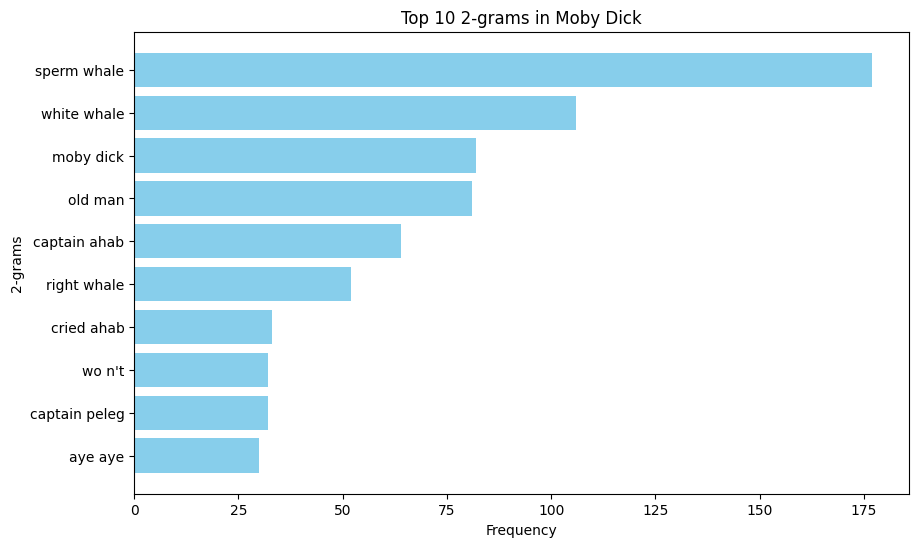

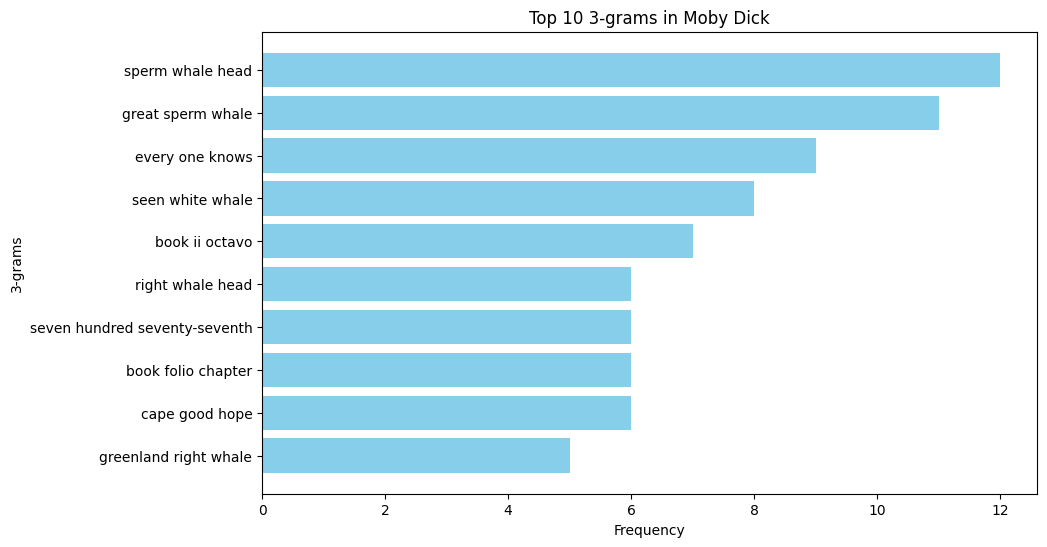

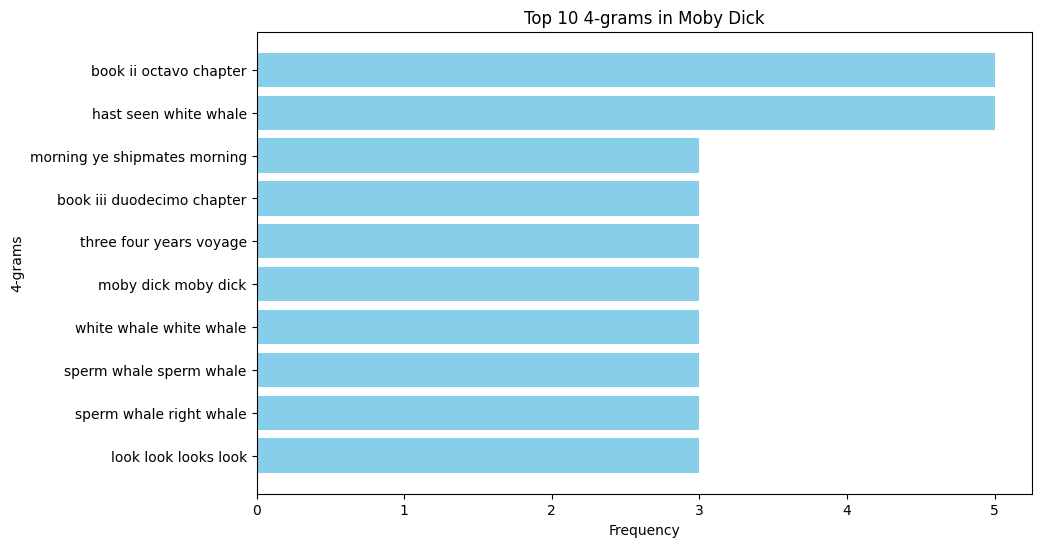

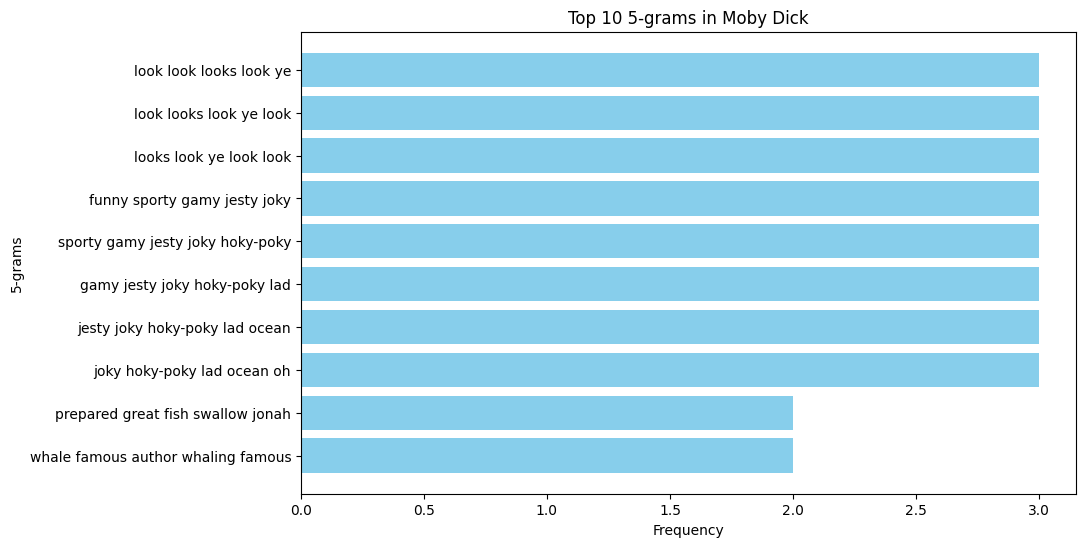

In [20]:
# 4. n-gram 시각화 함수
def plot_ngram_frequencies(ngram_counter, n, title):
    ngrams, counts = zip(*ngram_counter.most_common(10))
    ngrams = [' '.join(gram) for gram in ngrams]

    plt.figure(figsize=(10, 6))
    plt.barh(ngrams, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel(f'{n}-grams')
    plt.title(f'Top 10 {title}')
    plt.gca().invert_yaxis()
    plt.show()

# 5. 2-gram, 3-gram, 4-gram 시각화
plot_ngram_frequencies(bigrams, 2, '2-grams in Moby Dick')
plot_ngram_frequencies(trigrams, 3, '3-grams in Moby Dick')
plot_ngram_frequencies(fourgrams, 4, '4-grams in Moby Dick')
plot_ngram_frequencies(fivegrams, 5, '5-grams in Moby Dick')

In [21]:
# 찾고자 하는 패턴 정의
pattern = ["look", "look", "looks", "look", "ye"]

# 일치하는 인덱스를 저장할 리스트
matches = []

# 슬라이딩 윈도우 방식으로 검색
for i in range(len(processed_text) - len(pattern) + 1):
    # 현재 슬라이딩 윈도우의 부분 리스트
    window = processed_text[i:i + len(pattern)]

    # 패턴과 현재 윈도우가 일치하면 저장
    if window == pattern:
        matches.append((i, window))

# 결과 출력
if matches:
    print(f"Found {len(matches)} occurrences of the pattern:")
    for index, match in matches:
        print(f"Match at index {index}: {' '.join(match)}")
else:
    print("No matches found.")


Found 3 occurrences of the pattern:
Match at index 82677: look look looks look ye
Match at index 82695: look look looks look ye
Match at index 82705: look look looks look ye


In [22]:
processed_text[82677:82677+10]

['look',
 'look',
 'looks',
 'look',
 'ye',
 'look',
 'look',
 'upon',
 'soul',
 'studying']